In [1]:
import matplotlib.pyplot as plt
from numpy.core import numeric
import seaborn as sns; sns.set()
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import pandas as pd
import sklearn.linear_model
import os
import xgboost as xgb
from sklearn.datasets import make_classification
from sklearn.linear_model import LinearRegression
from sympy import *
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
pd.set_option('display.max_rows', 110)

In [2]:
dataFrame = pd.read_csv('inputs/railway.csv')
dataFrame_localTrain = dataFrame.drop(index=dataFrame[dataFrame['num']<1000].index)
dataFrame_localTrain

,Station,direction,id,date,time,num,dest,delay,type
0,Zhongli,0,1,2021/01/20,00:17,1287,Zhongli,1.0,D
1,Zhongli,0,2,2021/01/20,05:49,1109,Hsinchu,1.0,D
2,Zhongli,0,3,2021/01/20,06:05,2011,Changhua,0.0,D
3,Zhongli,0,4,2021/01/20,06:26,1107,Miaoli,0.0,D
4,Zhongli,0,5,2021/01/20,06:45,2133,Chiayi,0.0,D
...,...,...,...,...,...,...,...,...,...
321013,Kaohsiung,1,91,2021/04/06,22:13,3288,Yongkang,0.0,D
321014,Kaohsiung,1,92,2021/04/06,22:20,3088,Xinzuoying,1.0,D
321015,Kaohsiung,1,93,2021/04/06,22:34,3292,Tainan,0.0,D
321016,Kaohsiung,1,94,2021/04/06,22:55,3294,Tainan,0.0,D


# 2月10日 區間逆行

In [3]:
dataFrame_localTrain_2m10d = dataFrame_localTrain.drop(index=dataFrame_localTrain[dataFrame_localTrain['date']!='2021/02/10'].index)
dataFrame_localTrain_2m10d_counterclockwise = dataFrame_localTrain_2m10d.drop(index=dataFrame_localTrain_2m10d[dataFrame_localTrain_2m10d['direction']!=0].index)
dataFrame_localTrain_2m10d_counterclockwise

,Station,direction,id,date,time,num,dest,delay,type
1980,Zhongli,0,1,2021/02/10,00:17,1287,Zhongli,1.0,D
1981,Zhongli,0,2,2021/02/10,05:49,1109,Hsinchu,1.0,D
1982,Zhongli,0,3,2021/02/10,06:05,2011,Changhua,1.0,D
1983,Zhongli,0,4,2021/02/10,06:26,1107,Miaoli,0.0,D
1984,Zhongli,0,5,2021/02/10,06:45,2133,Chiayi,0.0,D
...,...,...,...,...,...,...,...,...,...
308319,Kaohsiung,0,88,2021/02/10,22:23,3087,Farliao,0.0,D
308321,Kaohsiung,0,90,2021/02/10,22:38,3277,Chaozhou,4.0,D
308322,Kaohsiung,0,91,2021/02/10,22:56,3271,Chaozhou,2.0,D
308323,Kaohsiung,0,92,2021/02/10,23:09,3037,Chaozhou,0.0,D


# 2月12日 順行

In [4]:
dataFrame_localTrain_2m12d = dataFrame_localTrain.drop(index=dataFrame_localTrain[dataFrame_localTrain['date']!='2021/02/12'].index)
dataFrame_localTrain_2m12d_clockwise = dataFrame_localTrain_2m12d.drop(index=dataFrame_localTrain_2m12d[dataFrame_localTrain_2m12d['direction']!=1].index)
dataFrame_localTrain_2m12d_clockwise

,Station,direction,id,date,time,num,dest,delay,type
9459,Zhongli,1,1,2021/02/12,05:18,4138,Su ao,0.0,D
9460,Zhongli,1,2,2021/02/12,05:44,1112,Keelung,0.0,D
9461,Zhongli,1,3,2021/02/12,06:03,1020,Nangang,0.0,D
9462,Zhongli,1,4,2021/02/12,06:18,1126,Keelung,0.0,D
9464,Zhongli,1,6,2021/02/12,06:37,4148,Su ao,2.0,D
...,...,...,...,...,...,...,...,...,...
315892,Kaohsiung,1,92,2021/02/12,22:13,3288,Yongkang,0.0,D
315893,Kaohsiung,1,93,2021/02/12,22:20,3088,Xinzuoying,0.0,D
315894,Kaohsiung,1,94,2021/02/12,22:34,3292,Tainan,0.0,D
315895,Kaohsiung,1,95,2021/02/12,22:55,3294,Tainan,0.0,D


# 3月5日 順行

In [5]:
dataFrame_localTrain_3m5d = dataFrame_localTrain.drop(index=dataFrame_localTrain[dataFrame_localTrain['date']!='2021/03/05'].index)
dataFrame_localTrain_3m5d_clockwise = dataFrame_localTrain_3m5d.drop(index=dataFrame_localTrain_3m5d[dataFrame_localTrain_3m5d['direction']!=1].index)
dataFrame_localTrain_3m5d_clockwise

,Station,direction,id,date,time,num,dest,delay,type
11459,Zhongli,1,1,2021/03/05,05:18,4138,Su ao,0.0,D
11460,Zhongli,1,2,2021/03/05,05:44,1112,Keelung,0.0,D
11461,Zhongli,1,3,2021/03/05,06:01,1120,Keelung,0.0,D
11462,Zhongli,1,4,2021/03/05,06:18,1122,Keelung,0.0,D
11464,Zhongli,1,6,2021/03/05,06:37,4148,Su ao,2.0,D
...,...,...,...,...,...,...,...,...,...
317924,Kaohsiung,1,92,2021/03/05,22:13,3288,Yongkang,4.0,D
317925,Kaohsiung,1,93,2021/03/05,22:20,3088,Xinzuoying,2.0,D
317926,Kaohsiung,1,94,2021/03/05,22:34,3292,Tainan,0.0,D
317927,Kaohsiung,1,95,2021/03/05,22:55,3294,Tainan,0.0,D


# 3月27日 順行

In [6]:
dataFrame_localTrain_3m27d = dataFrame_localTrain.drop(index=dataFrame_localTrain[dataFrame_localTrain['date']!='2021/03/27'].index)
dataFrame_localTrain_3m27d_clockwise = dataFrame_localTrain_3m27d.drop(index=dataFrame_localTrain_3m27d[dataFrame_localTrain_3m27d['direction']!=1].index)
dataFrame_localTrain_3m27d_clockwise

,Station,direction,id,date,time,num,dest,delay,type
13542,Zhongli,1,1,2021/03/27,05:18,4138,Su ao,0.0,D
13543,Zhongli,1,2,2021/03/27,05:44,1112,Keelung,0.0,D
13544,Zhongli,1,3,2021/03/27,06:18,1126,Keelung,0.0,D
13546,Zhongli,1,5,2021/03/27,06:37,4148,Su ao,1.0,D
13547,Zhongli,1,6,2021/03/27,06:48,1128,Keelung,1.0,D
...,...,...,...,...,...,...,...,...,...
320047,Kaohsiung,1,92,2021/03/27,22:13,3288,Chiayi,0.0,D
320048,Kaohsiung,1,93,2021/03/27,22:20,3088,Xinzuoying,1.0,D
320049,Kaohsiung,1,94,2021/03/27,22:34,3292,Tainan,2.0,D
320050,Kaohsiung,1,95,2021/03/27,22:55,3294,Tainan,0.0,D


# 先找出台中到彰化路段上，所有共通的車次

In [7]:
dataFrame_localTrain_Taichung = dataFrame_localTrain.drop(index=dataFrame_localTrain[dataFrame_localTrain['Station']!='Taichung'].index)
dataFrame_localTrain_Xinwuri = dataFrame_localTrain.drop(index=dataFrame_localTrain[dataFrame_localTrain['Station']!='Xinwuri'].index)
dataFrame_localTrain_Chenggong = dataFrame_localTrain.drop(index=dataFrame_localTrain[dataFrame_localTrain['Station']!='Tanzi'].index)
dataFrame_localTrain_Changhua = dataFrame_localTrain.drop(index=dataFrame_localTrain[dataFrame_localTrain['Station']!='Changhua'].index)

## 台中到新烏日

Modela slope:     0.7518439275825849
Modela intercept: 0.8016740287556798
LinearRegression Score:  0.5192066053024349


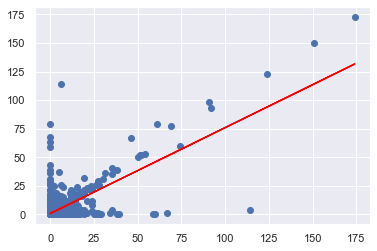

{x: 3.23052352072695, y: 3.23052352072695}
算出允許誤差
xgboost、lasso比較
xg Score:  0.644872798732794


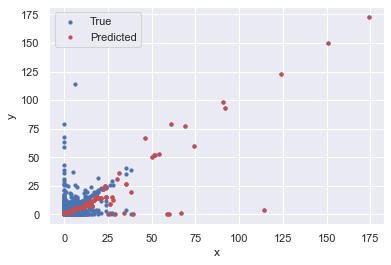

3.54882653335775


In [8]:
Taichung_Xinwuri_counterclockwise_nums = [num for num in set(dataFrame_localTrain_Xinwuri['num']) if (num in set(dataFrame_localTrain_Taichung['num']))and(num%2==1)]
x_dataFrame = dataFrame_localTrain_Taichung[dataFrame_localTrain_Taichung['num'].isin(Taichung_Xinwuri_counterclockwise_nums)]
x_dataFrame.reset_index(inplace=True)
y_dataFrame = dataFrame_localTrain_Xinwuri[dataFrame_localTrain_Xinwuri['num'].isin(Taichung_Xinwuri_counterclockwise_nums)]
y_dataFrame.reset_index(inplace=True)


null_index = list(x_dataFrame[x_dataFrame['delay'].isnull()].index)
null_index.extend(list(y_dataFrame[y_dataFrame['delay'].isnull()].index))
null_index = set(null_index)

x_dataFrame = x_dataFrame.drop(index=null_index)
y_dataFrame = y_dataFrame.drop(index=null_index)

x = x_dataFrame['delay'].to_numpy()
y = y_dataFrame['delay'].to_numpy()
x = x.reshape(-1,1)
model = LinearRegression(fit_intercept=True)
model.fit(x, y)
print("Modela slope:    ", model.coef_[0])
print("Modela intercept:", model.intercept_)
print("LinearRegression Score: ",model.score(x,y))

predict = model.predict(x)
plt.plot(x,predict,c="red")
plt.scatter(x,y)
plt.show()

k= model.coef_[0]
l= model.intercept_
xsymb,ysymb = symbols('x,y')
print(solve([k*xsymb+l-ysymb,xsymb-ysymb],[xsymb,ysymb]))
print("算出允許誤差")
print("xgboost、lasso比較")
xgbrModel=xgb.XGBRegressor()
xgbrModel.fit(x,y)
predicted=xgbrModel.predict(x)
print("xg Score: ",xgbrModel.score(x,y))
plt.scatter(x, y, s=10, label='True')
plt.scatter(x, predicted, color="r",s=10, label='Predicted')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()
v = mean_squared_error(y,predicted)
print(sqrt(v))

## 新烏日到成功

Modela slope:     0.9163146963984703
Modela intercept: 0.4106957193666254
LinearRegression Score:  0.8111152611643478


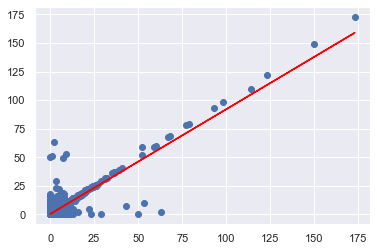

{x: 4.90762059395954, y: 4.90762059395954}
算出允許誤差
xgboost、lasso比較
xg Score:  0.8574114325516532


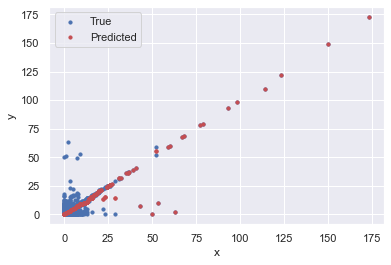

2.34445409109642


In [9]:
Xinwuri_Chenggong_counterclockwise_nums = [num for num in set(dataFrame_localTrain_Chenggong['num']) if (num in set(dataFrame_localTrain_Xinwuri['num']))and(num%2==1)]
x_dataFrame = dataFrame_localTrain_Xinwuri[dataFrame_localTrain_Xinwuri['num'].isin(Xinwuri_Chenggong_counterclockwise_nums)]
x_dataFrame.reset_index(inplace=True)
y_dataFrame = dataFrame_localTrain_Chenggong[dataFrame_localTrain_Chenggong['num'].isin(Xinwuri_Chenggong_counterclockwise_nums)]
y_dataFrame.reset_index(inplace=True)


null_index = list(x_dataFrame[x_dataFrame['delay'].isnull()].index)
null_index.extend(list(y_dataFrame[y_dataFrame['delay'].isnull()].index))
null_index = set(null_index)

x_dataFrame = x_dataFrame.drop(index=null_index)
y_dataFrame = y_dataFrame.drop(index=null_index)

x = x_dataFrame['delay'].to_numpy()
y = y_dataFrame['delay'].to_numpy()
x = x.reshape(-1,1)
model = LinearRegression(fit_intercept=True)
model.fit(x, y)
print("Modela slope:    ", model.coef_[0])
print("Modela intercept:", model.intercept_)
print("LinearRegression Score: ",model.score(x,y))

predict = model.predict(x)
plt.plot(x,predict,c="red")
plt.scatter(x,y)
plt.show()

k= model.coef_[0]
l= model.intercept_
xsymb,ysymb = symbols('x,y')
print(solve([k*xsymb+l-ysymb,xsymb-ysymb],[xsymb,ysymb]))
print("算出允許誤差")
print("xgboost、lasso比較")
xgbrModel=xgb.XGBRegressor()
xgbrModel.fit(x,y)
predicted=xgbrModel.predict(x)
print("xg Score: ",xgbrModel.score(x,y))
plt.scatter(x, y, s=10, label='True')
plt.scatter(x, predicted, color="r",s=10, label='Predicted')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()
v = mean_squared_error(y,predicted)
print(sqrt(v))

## 成功到彰化

Modela slope:     0.7150558867834748
Modela intercept: 0.7536783514500518
LinearRegression Score:  0.51725079073962


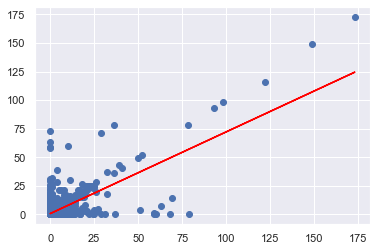

{x: 2.64500411306038, y: 2.64500411306038}
算出允許誤差
xgboost、lasso比較
xg Score:  0.6756186724942805


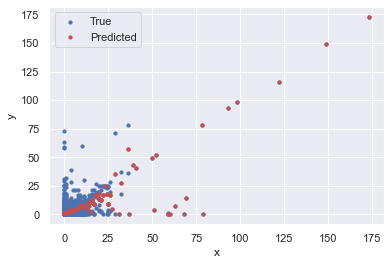

3.75392642270616


In [10]:
Chenggong_Changhua_counterclockwise_nums = [num for num in set(dataFrame_localTrain_Changhua['num']) if (num in set(dataFrame_localTrain_Chenggong['num']))and(num%2==1)]
x_dataFrame = dataFrame_localTrain_Chenggong[dataFrame_localTrain_Chenggong['num'].isin(Chenggong_Changhua_counterclockwise_nums)]
x_dataFrame.reset_index(inplace=True)
y_dataFrame = dataFrame_localTrain_Changhua[dataFrame_localTrain_Changhua['num'].isin(Chenggong_Changhua_counterclockwise_nums)]
y_dataFrame.reset_index(inplace=True)

null_index = list(x_dataFrame[x_dataFrame['delay'].isnull()].index)
null_index.extend(list(y_dataFrame[y_dataFrame['delay'].isnull()].index))
null_index = set(null_index)

x_dataFrame = x_dataFrame.drop(index=null_index)
y_dataFrame = y_dataFrame.drop(index=null_index)

x = x_dataFrame['delay'].to_numpy()
y = y_dataFrame['delay'].to_numpy()
x = x.reshape(-1,1)
model = LinearRegression(fit_intercept=True)
model.fit(x, y)
print("Modela slope:    ", model.coef_[0])
print("Modela intercept:", model.intercept_)
print("LinearRegression Score: ",model.score(x,y))

predict = model.predict(x)
plt.plot(x,predict,c="red")
plt.scatter(x,y)
plt.show()

k= model.coef_[0]
l= model.intercept_
xsymb,ysymb = symbols('x,y')
print(solve([k*xsymb+l-ysymb,xsymb-ysymb],[xsymb,ysymb]))
print("算出允許誤差")
print("xgboost、lasso比較")
xgbrModel=xgb.XGBRegressor()
xgbrModel.fit(x,y)
predicted=xgbrModel.predict(x)
print("xg Score: ",xgbrModel.score(x,y))
plt.scatter(x, y, s=10, label='True')
plt.scatter(x, predicted, color="r",s=10, label='Predicted')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()
v = mean_squared_error(y,predicted)
print(sqrt(v))

## 台中到彰化

Modela slope:     0.7126529074376848
Modela intercept: 1.0459312802192082
LinearRegression Score:  0.44748912785881756


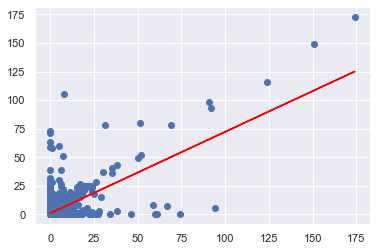

{x: 3.63995776290093, y: 3.63995776290093}
算出允許誤差
xgboost、lasso比較
xg Score:  0.6065700216022294


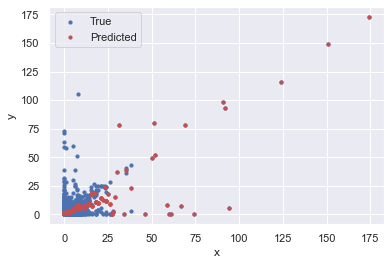

4.14895106665909


In [12]:
Taichung_Changhua_counterclockwise_nums = [num for num in set(dataFrame_localTrain_Changhua['num']) if (num in set(dataFrame_localTrain_Taichung['num']))and(num%2==1)]
x_dataFrame = dataFrame_localTrain_Taichung[dataFrame_localTrain_Taichung['num'].isin(Taichung_Changhua_counterclockwise_nums)]
x_dataFrame.reset_index(inplace=True)
y_dataFrame = dataFrame_localTrain_Changhua[dataFrame_localTrain_Changhua['num'].isin(Taichung_Changhua_counterclockwise_nums)]
y_dataFrame.reset_index(inplace=True)

null_index = list(x_dataFrame[x_dataFrame['delay'].isnull()].index)
null_index.extend(list(y_dataFrame[y_dataFrame['delay'].isnull()].index))
null_index = set(null_index)

x_dataFrame = x_dataFrame.drop(index=null_index)
y_dataFrame = y_dataFrame.drop(index=null_index)

x = x_dataFrame['delay'].to_numpy()
y = y_dataFrame['delay'].to_numpy()
x = x.reshape(-1,1)
model = LinearRegression(fit_intercept=True)
model.fit(x, y)
print("Modela slope:    ", model.coef_[0])
print("Modela intercept:", model.intercept_)
print("LinearRegression Score: ",model.score(x,y))

predict = model.predict(x)
plt.plot(x,predict,c="red")
plt.scatter(x,y)
plt.show()

k= model.coef_[0]
l= model.intercept_
xsymb,ysymb = symbols('x,y')
print(solve([k*xsymb+l-ysymb,xsymb-ysymb],[xsymb,ysymb]))
print("算出允許誤差")
print("xgboost、lasso比較")
xgbrModel=xgb.XGBRegressor()
xgbrModel.fit(x,y)
predicted=xgbrModel.predict(x)
print("xg Score: ",xgbrModel.score(x,y))
plt.scatter(x, y, s=10, label='True')
plt.scatter(x, predicted, color="r",s=10, label='Predicted')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()
v = mean_squared_error(y,predicted)
print(sqrt(v))